# AIM: Read the data sets collected from GPS reciever and filter it

## IMPORTS


In [1]:
import pandas as pd
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 21)

import seaborn as sns
import matplotlib.pyplot as plt


# USING OPENfIELD1data

In [2]:
colnm = ['code','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'] 
df = pd.read_csv("openField1.txt" ,names=colnm ,  header=None )
df

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,$GPGSV,3,1,11,02,41,255,40.0,04,14,074,29,05,35,299,38.0,06,25.0,201,41.0,1*63
1,$GPGSV,3,2,11,07,63,136,39.0,09,52,074,34,16,15,039,33.0,29,8.0,320,37.0,1*6C
2,$GPGSV,3,3,11,30,43,181,44.0,13,05,251,NaN,26,00,000,NaN,1*5D,NaN,NaN,NaN,NaN
3,$GLGSV,3,1,10,78,41,136,NaN,77,43,054,NaN,76,06,016,NaN,79,3.0,172,NaN,1*7A
4,$GLGSV,3,2,10,69,31,293,NaN,84,33,286,NaN,83,12,227,NaN,85,14.0,345,NaN,1*78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18688,$GNGSA,A,3,02,07,12,19,27.0,30,33,NaN,NaN,NaN,NaN,NaN,0.8,0.4,0.6,3*31,NaN,NaN
18689,$GNGSA,A,3,07,10,23,24,25.0,29,30,32,33,NaN,NaN,NaN,0.8,0.4,0.6,4*31,NaN,NaN
18690,$GNVTG,NaN,T,NaN,M,0.0,N,0.0,K,A*3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18691,$GNRMC,122531.00,A,5159.367185,N,00422.977396,E,0.0,NaN,191120,1.8,W,A,V*6F,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## $GPGSV dataset
### GPS Satellites in view

```
eg. $GPGSV,3,1,11,03,03,111,00,04,15,270,00,06,01,010,00,13,06,292,00*74
    $GPGSV,3,2,11,14,25,170,00,16,57,208,39,18,67,296,40,19,40,246,00*74
    $GPGSV,3,3,11,22,42,067,42,24,14,311,43,27,05,244,00,,,,*4D


    $GPGSV,1,1,13,02,02,213,,03,-3,000,,11,00,121,,14,13,172,05*67

1    = Total number of messages of this type in this cycle
2    = Message number
3    = Total number of SVs in view
4    = SV PRN number
5    = Elevation in degrees, 90 maximum
6    = Azimuth, degrees from true north, 000 to 359
7    = SNR, 00-99 dB (null when not tracking)
8-11 = Information about second SV, same as field 4-7
12-15= Information about third SV, same as field 4-7
16-19= Information about fourth SV, same as field 4-7
```


In [38]:
gsv = df[ df['code'] == '$GPGV']
gsv

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


## $GPGSA datasets

### GPS DOP and active satellites

```
eg1. $GPGSA,A,3,,,,,,16,18,,22,24,,,3.6,2.1,2.2*3C
eg2. $GPGSA,A,3,19,28,14,18,27,22,31,39,,,,,1.7,1.0,1.3*35


1    = Mode:
       M=Manual, forced to operate in 2D or 3D
       A=Automatic, 3D/2D
2    = Mode:
       1=Fix not available
       2=2D
       3=3D
3-14 = IDs of SVs used in position fix (null for unused fields)
15   = PDOP
16   = HDOP
17   = VDOP
```

In [4]:
gsa = df[ (df['code']=='$GNGSA') & (df['3'] < '64' )]
# SV ID < 64 => a NAVSTAR satellite
gsa=gsa[['code','1','15','16','17','18']]
gsa.columns = ['code','mode','PDOP','HDOP','VDOP','18']
gsa


,code,mode,PDOP,HDOP,VDOP,18
13,$GNGSA,A,0.7,0.4,0.6,1*31
15,$GNGSA,A,0.7,0.4,0.6,3*3A
16,$GNGSA,A,0.7,0.4,0.6,4*3F
33,$GNGSA,A,0.7,0.4,0.6,1*31
35,$GNGSA,A,0.7,0.4,0.6,3*3A
...,...,...,...,...,...,...
18667,$GNGSA,A,0.8,0.4,0.6,3*31
18668,$GNGSA,A,0.8,0.4,0.6,4*31
18686,$GNGSA,A,0.8,0.4,0.6,1*3D
18688,$GNGSA,A,0.8,0.4,0.6,3*31


count    2766.000000
mean        0.776573
std         0.042362
min         0.700000
25%         0.800000
50%         0.800000
75%         0.800000
max         0.800000
Name: PDOP, dtype: float64
count    2766.000000
mean        0.602603
std         0.015925
min         0.600000
25%         0.600000
50%         0.600000
75%         0.600000
max         0.700000
Name: VDOP, dtype: float64
count     2766
unique       1
top        0.4
freq      2766
Name: HDOP, dtype: object


[]

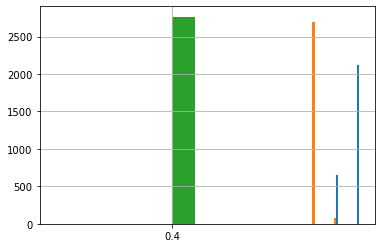

In [5]:
print(gsa.PDOP.describe())
print(gsa.VDOP.describe())
print(gsa.HDOP.describe())

gsa.PDOP.hist()
plt.plot()
gsa.VDOP.hist()
plt.plot()
gsa.HDOP.hist()
plt.plot()

# $GPRMC
## Recommended minimum specific GPS/Transit data

```
eg1. $GPRMC,081836,A,3751.65,S,14507.36,E,000.0,360.0,130998,011.3,E*62
eg2. $GPRMC,225446,A,4916.45,N,12311.12,W,000.5,054.7,191194,020.3,E*68


           225446       Time of fix 22:54:46 UTC
           A            Navigation receiver warning A = OK, V = warning
           4916.45,N    Latitude 49 deg. 16.45 min North
           12311.12,W   Longitude 123 deg. 11.12 min West
           000.5        Speed over ground, Knots
           054.7        Course Made Good, True
           191194       Date of fix  19 November 1994
           020.3,E      Magnetic variation 20.3 deg East
           *68          mandatory checksum
```           

In [20]:
rmc = df[(df['code']=="$GNRMC") & (df['8'] is not None)]
rmc = rmc[['code','1','9','3','4','5','6','10','11']]
rmc.columns = ['code','tome_fix','date_fix','lat','lat_dir','long','long_dir','magnetic_variation','mag_dir']
rmc

rmc.to_csv('./csv/rmc.csv')

<AxesSubplot:xlabel='long', ylabel='lat'>

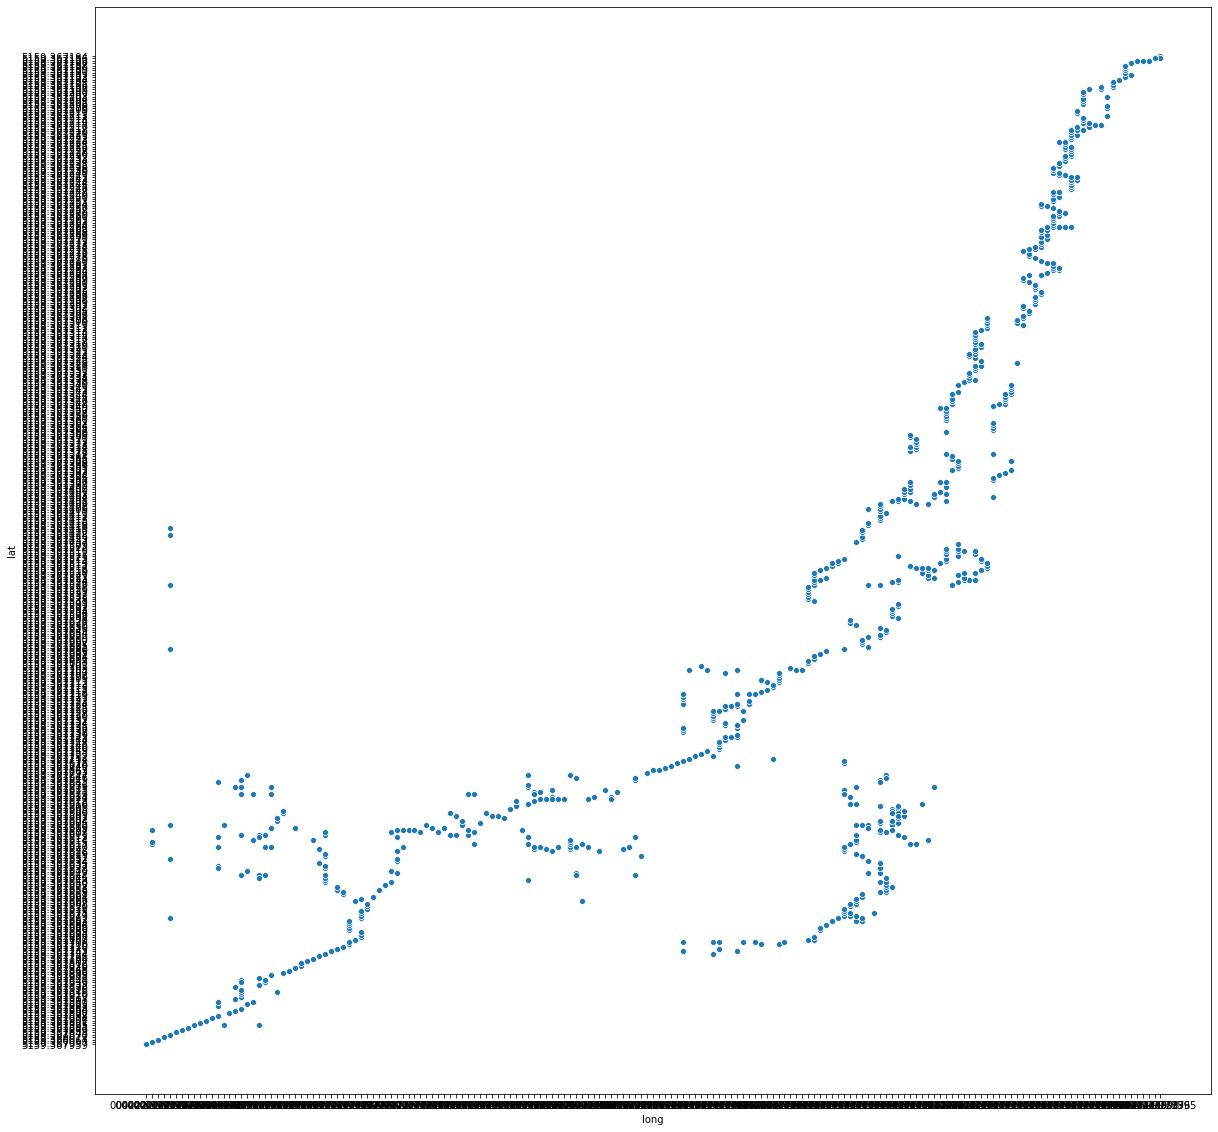

In [17]:
# rmc.plot(kind='scatter')
plt.figure(figsize=(20,20))
sns.scatterplot(rmc.long, rmc.lat)


# $GNGGA

## Global Positioning System Fix Data

```
eg3. $GPGGA,hhmmss.ss,llll.ll,a,yyyyy.yy,a,x,xx,x.x,x.x,M,x.x,M,x.x,xxxx*hh
1    = UTC of Position
2    = Latitude
3    = N or S
4    = Longitude
5    = E or W
6    = GPS quality indicator (0=invalid; 1=GPS fix; 2=Diff. GPS fix)
7    = Number of satellites in use [not those in view]
8    = Horizontal dilution of position
9    = Antenna altitude above/below mean sea level (geoid)
10   = Meters  (Antenna height unit)
11   = Geoidal separation (Diff. between WGS-84 earth ellipsoid and
       mean sea level.  -=geoid is below WGS-84 ellipsoid)
12   = Meters  (Units of geoidal separation)
13   = Age in seconds since last update from diff. reference station
14   = Diff. reference station ID#
15   = Checksum

```




Yes, NMEA format is ddmm.mmmm, n/s (d)ddmm.mmmm, e/w

To get to decimal degrees from degrees ad minutes, you use the following formula:

(d)dd + (mm.mmmm/60) (* -1 for W and S)


There are 60 minutes in a degree so divide the minutes by 60 and add that to the degrees.

For the Latitude=35.15 N
35.15/60 = .5858 N

For the Longitude= 12849.52 E,
128+ 49.52/60 = 128.825333 E

In [20]:
def make_lat(lat): # ddmm.mmmm, n/s
    lat_deg = float(str(lat).split('.')[0][:-2])
    lat_min = float(str(lat).split('.')[0][-2:] +'.'+ str(lat).split(".")[1]) /60
    lat_deg += lat_min
    return(lat_deg)




In [23]:
gga = df[ (df['code']=='$GNGGA') ]

gga = gga[['code','1','2','3','4','5','6','7','8','9','10','11','12','14']]

gga.columns = ['code','utc','lat','lat_dir','lon','lon_dir','gps_qual','no_sat',
                'HD_posn', 'Ant_alt','ant_alt_unit','goid_sep','geod_sep_unit', 'checksum']

gga['lat_wgs84'] = gga.lat.apply(make_lat)
gga['lon_wgs84'] = gga.lon.apply(make_lat)
gga.to_csv('./csv/redo_latlon/gga_open_1.csv')
gga 

,code,utc,lat,lat_dir,lon,lon_dir,gps_qual,no_sat,HD_posn,Ant_alt,ant_alt_unit,goid_sep,geod_sep_unit,checksum,lat_wgs84,lon_wgs84
19,$GNGGA,121010.08,5159.367959,N,00422.977007,E,1,12.0,0.4,0.4,M,47.0,M,*7C,51.989466,4.382950
39,$GNGGA,121011.00,5159.367997,N,00422.977110,E,1,12.0,0.4,0.1,M,47.0,M,*75,51.989467,4.382952
59,$GNGGA,121012.00,5159.368064,N,00422.977182,E,1,12.0,0.4,-0.2,M,47.0,M,*59,51.989468,4.382953
79,$GNGGA,121013.00,5159.368077,N,00422.977378,E,1,12.0,0.4,0.1,M,47.0,M,*73,51.989468,4.382956
99,$GNGGA,121014.00,5159.367870,N,00422.977444,E,1,12.0,0.4,-0.2,M,47.0,M,*52,51.989464,4.382957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,$GNGGA,122527.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*54,51.989453,4.382957
18629,$GNGGA,122528.00,5159.367184,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*5A,51.989453,4.382957
18650,$GNGGA,122529.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*5A,51.989453,4.382957
18671,$GNGGA,122530.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*52,51.989453,4.382957


<AxesSubplot:xlabel='lon', ylabel='lat'>

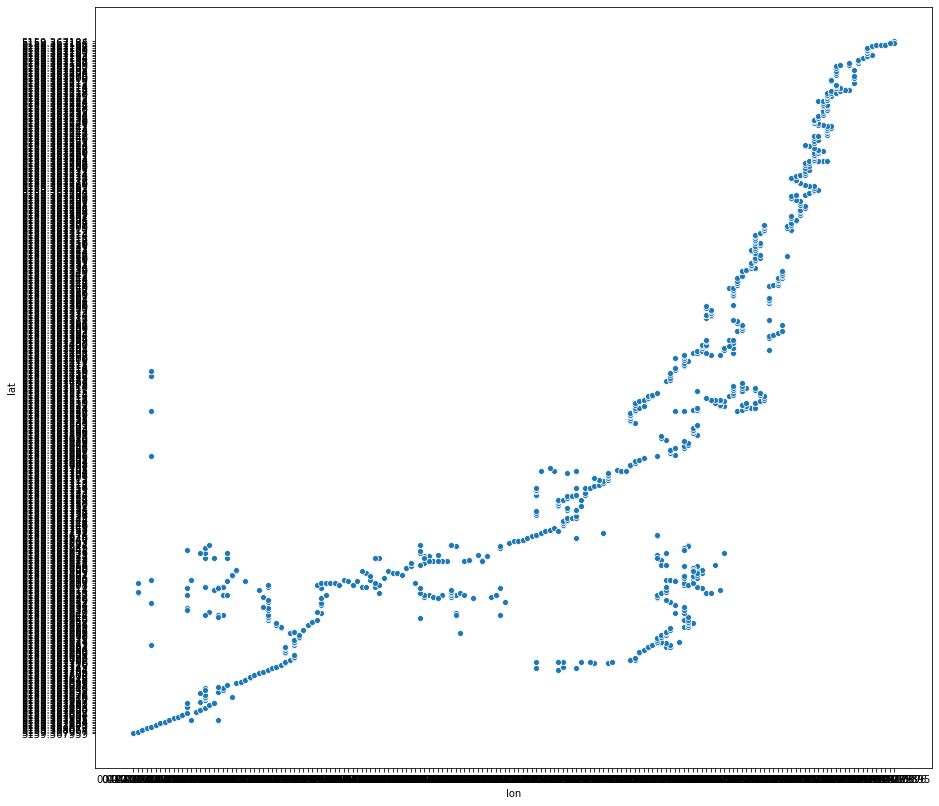

In [16]:
plt.figure(figsize=(20,20))
sns.scatterplot(gga.lon, gga.lat)

# open Field 1.5m away 
using GGA only and exporting


In [29]:
colnm = ['code','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'] 
df = pd.read_csv("openField2.txt" ,names=colnm ,  header=None )
df

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,$GPGSV,3,1,10,02,37,247,40.0,04,08,077,39,07,67,119,39.0,09,45.0,078,46.0,1*62
1,$GPGSV,3,2,10,13,11,255,41.0,30,52,178,45,05,42,298,NaN,06,18.0,198,NaN,1*65
2,$GPGSV,3,3,10,16,13,032,NaN,29,07,314,NaN,1*6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GLGSV,3,1,09,85,18,340,39.0,67,26,097,40,78,49,129,NaN,77,39.0,045,NaN,1*76
4,$GLGSV,3,2,09,79,11,172,NaN,69,39,299,NaN,84,29,277,NaN,83,4.0,224,NaN,1*73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17339,$GNGSA,A,3,07,11,12,19,27.0,30,33,NaN,NaN,NaN,NaN,NaN,0.8,0.5,0.6,3*32,NaN,NaN
17340,$GNGSA,A,3,07,10,23,24,25.0,29,30,32,33,NaN,NaN,NaN,0.8,0.5,0.6,4*30,NaN,NaN
17341,$GNVTG,NaN,T,NaN,M,0.0,N,0.0,K,A*3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17342,$GNRMC,124143.00,A,5159.366724,N,00422.977583,E,0.0,NaN,191120,1.8,W,A,V*66,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
gga_2 = df[ (df['code']=='$GNGGA') ]

gga_2 = gga_2[['code','1','2','3','4','5','6','7','8','9','10','11','12','14']]
gga_2.columns = ['code','utc','lat','lat_dir','lon','lon_dir','gps_qual','no_sat',
                'HD_posn', 'Ant_alt','ant_alt_unit','goid_sep','geod_sep_unit', 'checksum']

gga_2['lat_wgs84'] = gga_2.lat.apply(make_lat)
gga_2['lon_wgs84'] = gga_2.lon.apply(make_lat)

gga_2.to_csv('./csv/redo_latlon/gga_open_2.csv')
gga_2 

,code,utc,lat,lat_dir,lon,lon_dir,gps_qual,no_sat,HD_posn,Ant_alt,ant_alt_unit,goid_sep,geod_sep_unit,checksum,lat_wgs84,lon_wgs84
19,$GNGGA,121010.08,5159.367959,N,00422.977007,E,1,12.0,0.4,0.4,M,47.0,M,*7C,51.989466,4.382950
39,$GNGGA,121011.00,5159.367997,N,00422.977110,E,1,12.0,0.4,0.1,M,47.0,M,*75,51.989467,4.382952
59,$GNGGA,121012.00,5159.368064,N,00422.977182,E,1,12.0,0.4,-0.2,M,47.0,M,*59,51.989468,4.382953
79,$GNGGA,121013.00,5159.368077,N,00422.977378,E,1,12.0,0.4,0.1,M,47.0,M,*73,51.989468,4.382956
99,$GNGGA,121014.00,5159.367870,N,00422.977444,E,1,12.0,0.4,-0.2,M,47.0,M,*52,51.989464,4.382957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,$GNGGA,122527.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*54,51.989453,4.382957
18629,$GNGGA,122528.00,5159.367184,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*5A,51.989453,4.382957
18650,$GNGGA,122529.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*5A,51.989453,4.382957
18671,$GNGGA,122530.00,5159.367185,N,00422.977395,E,1,12.0,0.4,-2.8,M,47.0,M,*52,51.989453,4.382957


# South block datas

In [28]:
colnm = ['code','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'] 
df1block = pd.read_csv("blocked1.txt" ,names=colnm ,  header=None )
df2block = pd.read_csv("blocked2.txt" ,names=colnm ,  header=None )
df2block

,code,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,$GPGSV,3,1,10,02,28,309,32.0,03,30,101,38,04,60,067,27.0,06,63.0,260,39.0,1*64
1,$GPGSV,3,2,10,22,09,108,46.0,26,07,052,28,07,17,168,NaN,09,74.0,212,NaN,1*6D
2,$GPGSV,3,3,10,17,08,223,NaN,19,17,234,NaN,1*63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GLGSV,3,1,10,68,34,270,35.0,66,29,066,NaN,82,37,215,NaN,77,18.0,120,NaN,1*78
4,$GLGSV,3,2,10,76,30,064,NaN,75,13,014,NaN,84,11,340,NaN,83,51.0,286,NaN,1*75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27272,$GNGSA,A,3,66,67,68,76,77.0,82,83,NaN,NaN,NaN,NaN,NaN,0.8,0.5,0.6,2*36,NaN,NaN
27273,$GNGSA,A,3,02,07,08,12,30.0,33,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.5,0.6,3*35,NaN,NaN
27274,$GNGSA,A,3,07,09,14,24,25.0,26,27,30,33,NaN,NaN,NaN,0.8,0.5,0.6,4*37,NaN,NaN
27275,$GNVTG,NaN,T,NaN,M,0.0,N,0.0,K,A*3D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
gga_b1 = df1block[ (df1block['code']=='$GNGGA') ]

gga_b1 = gga_b1[['code','1','2','3','4','5','6','7','8','9','10','11','12','14']]
gga_b1.columns = ['code','utc','lat','lat_dir','lon','lon_dir','gps_qual','no_sat',
                'HD_posn', 'Ant_alt','ant_alt_unit','goid_sep','geod_sep_unit', 'checksum']

gga_b1['lat_wgs84'] = gga_b1.lat.apply(make_lat)
gga_b1['lon_wgs84'] = gga_b1.lon.apply(make_lat)

gga_b1.to_csv('./csv/redo_latlon/gga_b1.csv')
gga_b1

,code,utc,lat,lat_dir,lon,lon_dir,gps_qual,no_sat,HD_posn,Ant_alt,ant_alt_unit,goid_sep,geod_sep_unit,checksum,lat_wgs84,lon_wgs84
19,$GNGGA,100250.44,5200.057436,N,00422.754989,E,1,12.0,0.8,2.3,M,47.0,M,*73,52.000957,4.379250
26,$GNGGA,100251.00,5200.057929,N,00422.755260,E,1,12.0,0.8,2.2,M,47.0,M,*7D,52.000965,4.379254
46,$GNGGA,100252.00,5200.058296,N,00422.755448,E,1,12.0,0.8,2.3,M,47.0,M,*73,52.000972,4.379257
66,$GNGGA,100253.00,5200.058367,N,00422.755473,E,1,12.0,0.8,2.2,M,47.0,M,*74,52.000973,4.379258
94,$GNGGA,100254.00,5200.058354,N,00422.755437,E,1,12.0,0.7,2.1,M,47.0,M,*7F,52.000973,4.379257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26546,$GNGGA,101826.00,5200.053338,N,00422.750504,E,1,12.0,0.6,-7.0,M,47.0,M,*5C,52.000889,4.379175
26575,$GNGGA,101827.00,5200.053341,N,00422.750505,E,1,12.0,0.6,-7.0,M,47.0,M,*52,52.000889,4.379175
26604,$GNGGA,101828.00,5200.053342,N,00422.750505,E,1,12.0,0.6,-7.0,M,47.0,M,*5E,52.000889,4.379175
26633,$GNGGA,101829.00,5200.053343,N,00422.750501,E,1,12.0,0.6,-7.0,M,47.0,M,*5A,52.000889,4.379175


In [30]:
gga_b2 = df2block[ (df2block['code']=='$GNGGA') ]

gga_b2 = gga_b2[['code','1','2','3','4','5','6','7','8','9','10','11','12','14']]
gga_b2.columns = ['code','utc','lat','lat_dir','lon','lon_dir','gps_qual','no_sat',
                'HD_posn', 'Ant_alt','ant_alt_unit','goid_sep','geod_sep_unit', 'checksum']

gga_b2['lat_wgs84'] = gga_b2.lat.apply(make_lat)
gga_b2['lon_wgs84'] = gga_b2.lon.apply(make_lat)

gga_b2.to_csv('./csv/redo_latlon/gga_b2.csv')
gga_b2

,code,utc,lat,lat_dir,lon,lon_dir,gps_qual,no_sat,HD_posn,Ant_alt,ant_alt_unit,goid_sep,geod_sep_unit,checksum,lat_wgs84,lon_wgs84
18,$GNGGA,101931.65,5200.056782,N,00422.748675,E,1,12.0,0.8,-11.7,M,47.0,M,*6A,52.000946,4.379145
38,$GNGGA,101933.00,5200.056575,N,00422.748677,E,1,12.0,0.7,-11.5,M,47.0,M,*6E,52.000943,4.379145
58,$GNGGA,101934.00,5200.056513,N,00422.748740,E,1,12.0,0.7,-11.2,M,47.0,M,*6B,52.000942,4.379146
78,$GNGGA,101935.00,5200.056455,N,00422.748807,E,1,12.0,0.7,-11.1,M,47.0,M,*66,52.000941,4.379147
98,$GNGGA,101936.00,5200.056429,N,00422.748811,E,1,12.0,0.7,-11.0,M,47.0,M,*68,52.000940,4.379147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27127,$GNGGA,103449.00,5200.054840,N,00422.750181,E,1,12.0,0.6,-11.7,M,47.0,M,*61,52.000914,4.379170
27157,$GNGGA,103450.00,5200.054841,N,00422.750180,E,1,12.0,0.6,-11.7,M,47.0,M,*69,52.000914,4.379170
27187,$GNGGA,103451.00,5200.054840,N,00422.750180,E,1,12.0,0.6,-11.7,M,47.0,M,*69,52.000914,4.379170
27217,$GNGGA,103452.00,5200.054841,N,00422.750181,E,1,12.0,0.6,-11.7,M,47.0,M,*6A,52.000914,4.379170
